# 排序

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from plotnine import *

## Lollipop


In [2]:
mpg = pl.read_csv("data/mpg.csv")
mpg.head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
str,str,f64,i64,i64,str,str,i64,i64,str,str
"""audi""","""a4""",1.8,1999,4,"""auto(l5)""","""f""",18,29,"""p""","""compact"""
"""audi""","""a4""",1.8,1999,4,"""manual(m5)""","""f""",21,29,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""manual(m6)""","""f""",20,31,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""auto(av)""","""f""",21,30,"""p""","""compact"""
"""audi""","""a4""",2.8,1999,6,"""auto(l5)""","""f""",16,26,"""p""","""compact"""


In [3]:
mpg_group = (
    mpg[:, ["cty", "manufacturer"]].group_by("manufacturer").agg(pl.col("cty").mean())
)
mpg_group.head()

manufacturer,cty
str,f64
"""toyota""",18.529412
"""audi""",17.611111
"""dodge""",13.135135
"""honda""",24.444444
"""hyundai""",18.642857


In [4]:
mpg_group = mpg_group.sort(by="cty").with_row_index()
mpg_group.head()

index,manufacturer,cty
u32,str,f64
0,"""lincoln""",11.333333
1,"""land rover""",11.5
2,"""dodge""",13.135135
3,"""mercury""",13.25
4,"""jeep""",13.5


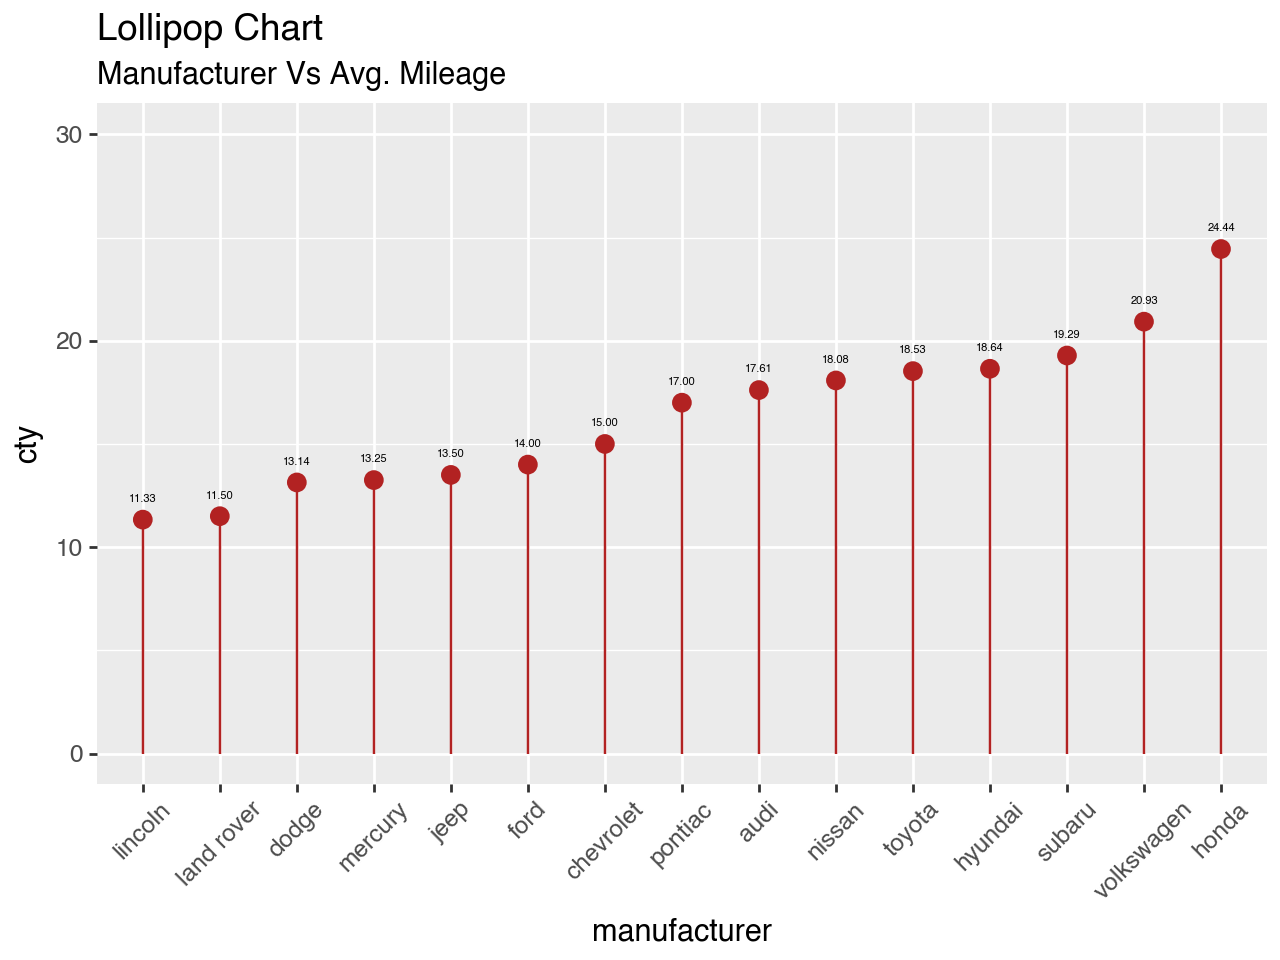

In [5]:
(
    ggplot(mpg_group, aes(x="manufacturer", y="cty", label="cty"))
    + geom_point(size=3, color="firebrick")
    + geom_segment(
        aes(x="manufacturer", xend="manufacturer", y=0, yend="cty"), color="firebrick"
    )
    + geom_text(color="black", size=4, nudge_y=1, format_string="{:.2f}")
    + labs(title="Lollipop Chart", subtitle="Manufacturer Vs Avg. Mileage")
    + scale_x_discrete(limits=mpg_group["manufacturer"])
    + theme(axis_text_x=element_text(angle=45, vjust=1))
    + ylim(0, 30)
)

## Slope


In [6]:
gdp = pl.read_csv("data/gdp_per_cap.csv")
gdp.head()

continent,1952,1957
str,f64,f64
"""Africa""",1252.572466,1385.236062
"""Americas""",4079.062552,4616.043733
"""Asia""",5195.484004,4003.13294
"""Europe""",5661.057435,6963.012816
"""Oceania""",10298.08565,11598.522455


In [7]:
gdp_new = gdp.unpivot(
    on=["1952", "1957"], index="continent", variable_name="time", value_name="total"
).with_columns(continent=pl.col("continent").cast(pl.Categorical))
gdp_new

continent,time,total
cat,str,f64
"""Africa""","""1952""",1252.572466
"""Americas""","""1952""",4079.062552
"""Asia""","""1952""",5195.484004
"""Europe""","""1952""",5661.057435
"""Oceania""","""1952""",10298.08565
"""Africa""","""1957""",1385.236062
"""Americas""","""1957""",4616.043733
"""Asia""","""1957""",4003.13294
"""Europe""","""1957""",6963.012816


In [8]:
_, ax = plt.subplots(figsize=(10, 5))

for cont in gdp_new["continent"]:
    gdp_newi = gdp_new.filter(pl.col("continent") == cont)
    ax.plot(gdp_newi["time"], gdp_newi["total"], label=cont)

for i in [0, 1]:
    ax.vlines(
        x=i,
        ymin=gdp_new["total"].min(),
        ymax=gdp_new["total"].max(),
        colors="k",
        linestyle="dotted",
    )

ax.set(
    xlabel="Time",
    ylabel="Mean GDP Per Capita",
    title="Slopechart: Comparing GDP Per Capita between 1952 vs 1957\n",
    xticks=[0, 1],
    xticklabels=["1952", "1957"],
)

ax.legend(
    gdp_new["continent"].unique(),
    loc="center",
    bbox_to_anchor=(0.5, 1),
    ncol=len(gdp_new["continent"].unique()),
    fontsize="small",
)
ax.spines[["right", "top", "left"]].set_visible(False)

In [9]:
gdp = gdp.with_columns(Class=np.where(gdp["1957"] - gdp["1952"] < 0, "red", "green"))
gdp

continent,1952,1957,Class
str,f64,f64,str
"""Africa""",1252.572466,1385.236062,"""green"""
"""Americas""",4079.062552,4616.043733,"""green"""
"""Asia""",5195.484004,4003.13294,"""red"""
"""Europe""",5661.057435,6963.012816,"""green"""
"""Oceania""",10298.08565,11598.522455,"""green"""


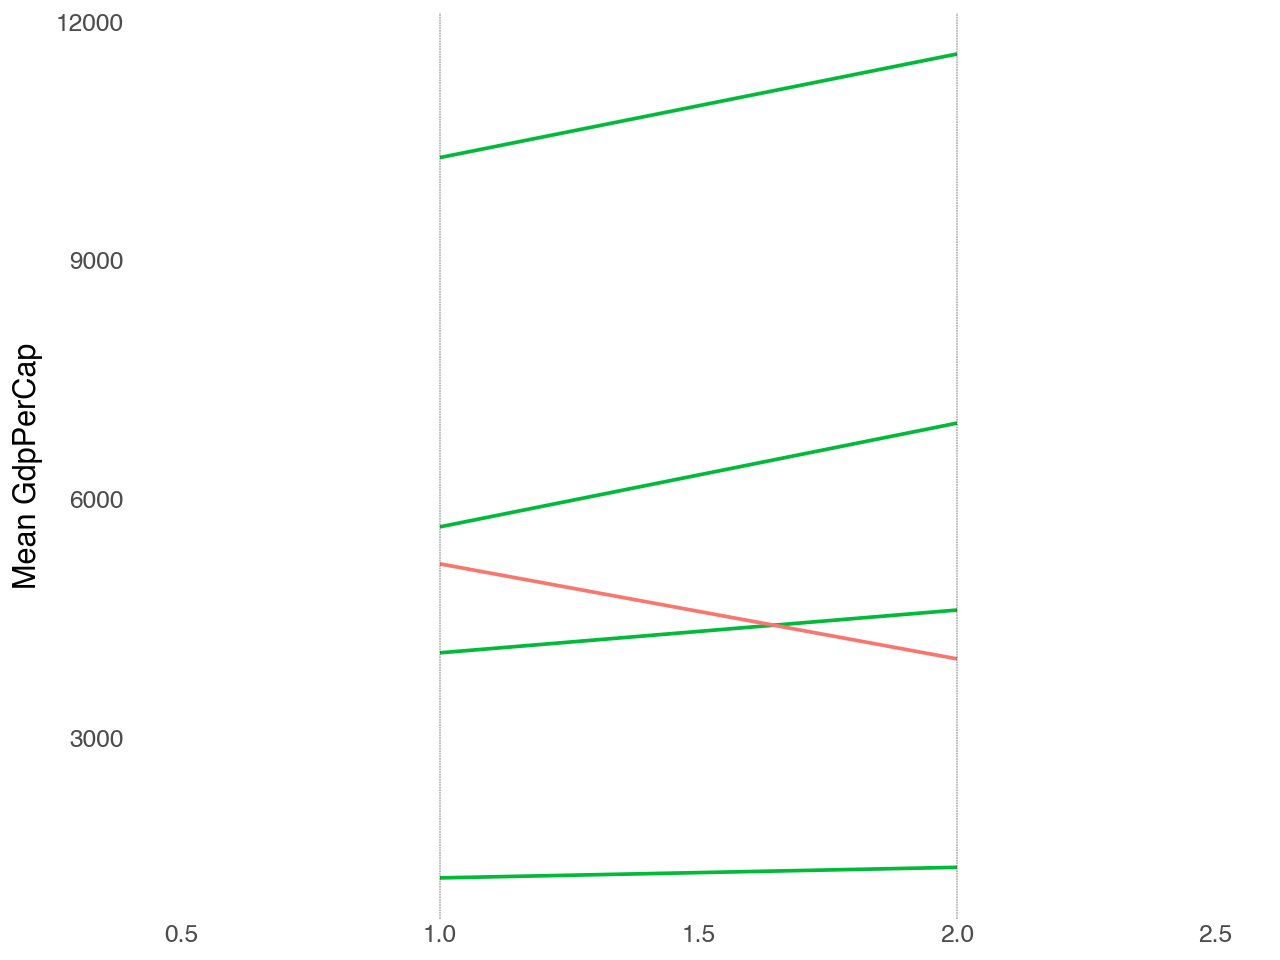

In [10]:
(
    ggplot(gdp)
    + geom_segment(aes(x=1, xend=2, y="1952", yend="1957", color="Class"), size=0.75)
    + geom_vline(xintercept=1, linetype="dashed", size=0.1)
    + geom_vline(xintercept=2, linetype="dashed", size=0.1)
    + scale_color_manual(
        labels=["Up", "Down"], values={"green": "#00ba38", "red": "#f8766d"}
    )
    + labs(x="", y="Mean GdpPerCap")
    + xlim(0.5, 2.5)
    + theme(
        panel_background=element_blank(),
        panel_grid=element_blank(),
        axis_ticks=element_blank(),
        # axis_text_x=element_blank(),
        panel_border=element_blank(),
        legend_position="none",
    )
)